## <a name="functions">Functions</a> 

In [1]:
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # Calculate uniqueness
from soan.whatsapp import emoji       # Analyse use of emoji
from soan.whatsapp import topic       # Topic modeling
from soan.whatsapp import sentiment   # Sentiment analyses
from soan.whatsapp import wordcloud   # Sentiment-based Word Clouds
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = helper.import_data('whatsapp.txt')
df = helper.preprocess_data(df)


## <a name="general">General Statistics</a> 


#### <a name="users">Users in the group</a> 


In [3]:
general.print_users(df)


#############
##  Users  ##
#############

Person1
Person2
Person4
Person3
Person6
Person5
Person7
Person8
Person9
Person10
Person11
Person13
Person12
Person14
Person15
Person16
Person17
Person18
Person19
Person20
Person21
Person22
Person23
Person24
Person25
Person26
Person27
Person28
Person29
Person30
Person31
Person32
Person33
Person34
Person35
Person36
Person37
Person38
Person39
Person40
Person41
Person42
Person43
Person44
Person45
Person46
Person47
Person48
Person49
Person50
Person51
Person52
Person53
Person54
Person55
Person56


In [4]:
user = "Person2"
language = "indonesian"


#### <a name="gs-messages">Messages over time</a> 


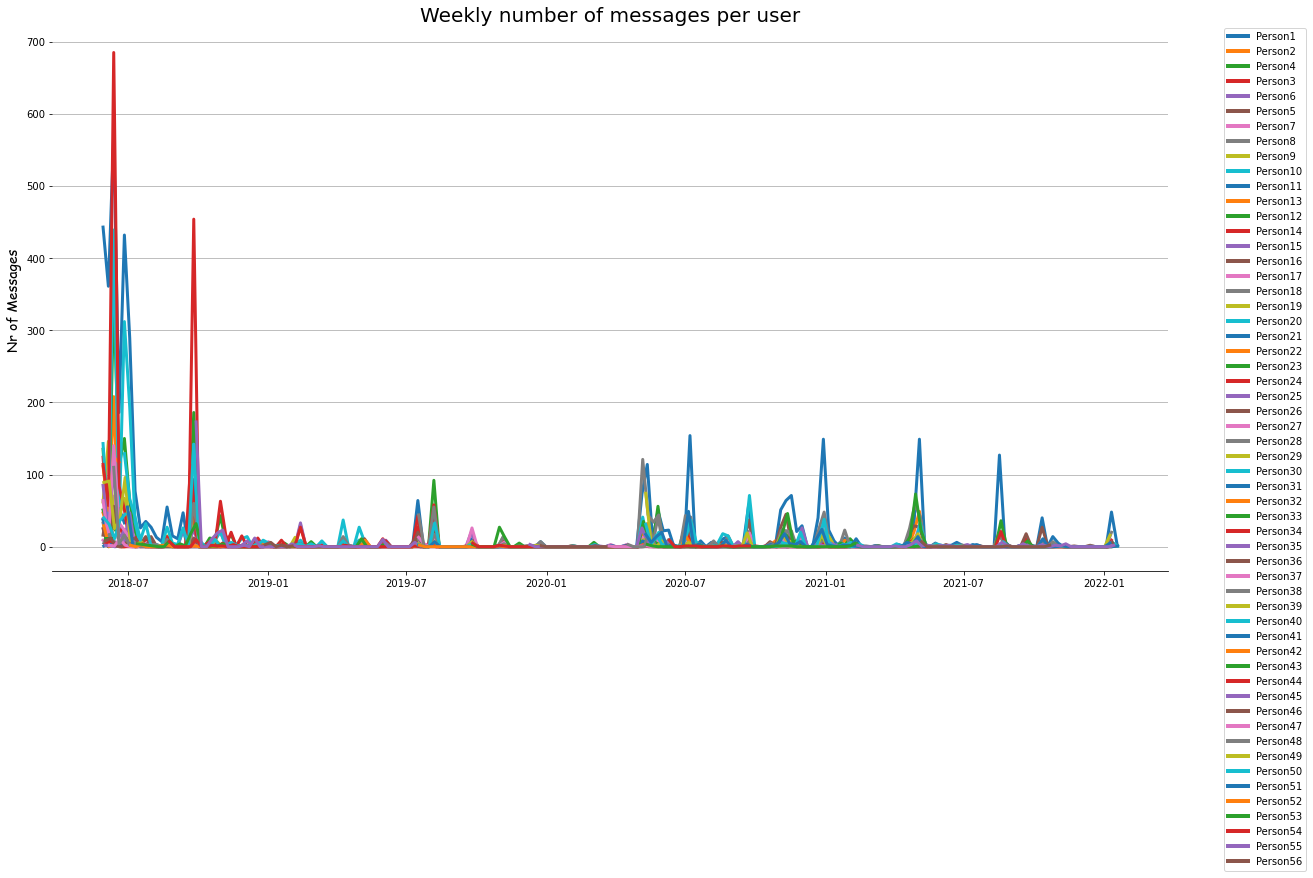

In [5]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)


#### <a name="gs-active">Active Moments</a> 


**Daily Activity**  


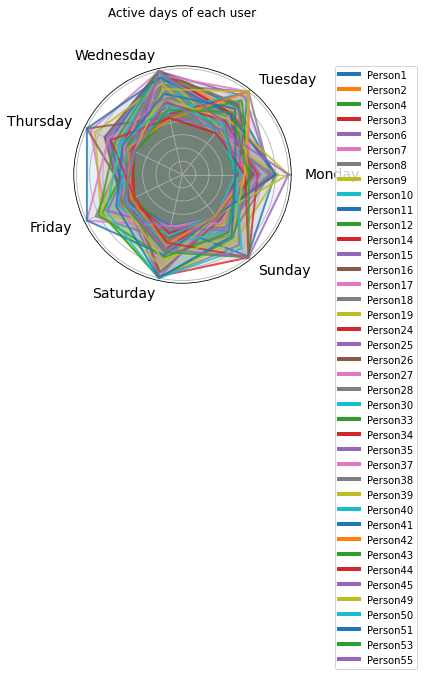

In [6]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)


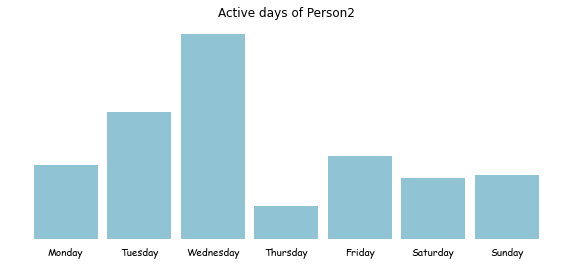

In [7]:
general.plot_active_days(df, savefig=False, dpi=100, user=user)


**Hourly Activity**  


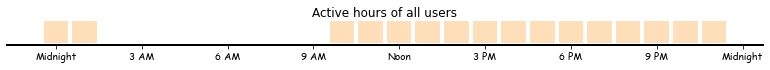

In [8]:
general.plot_active_hours(
    df, color='#ffdfba', savefig=False, dpi=100, user='All')


**Calendar Map**  


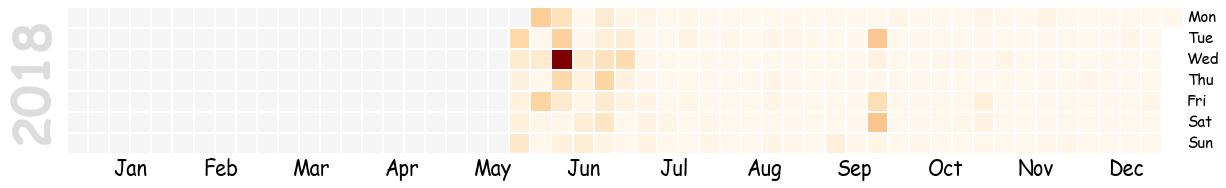

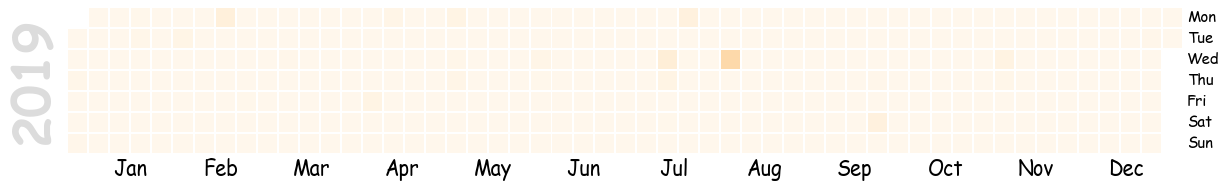

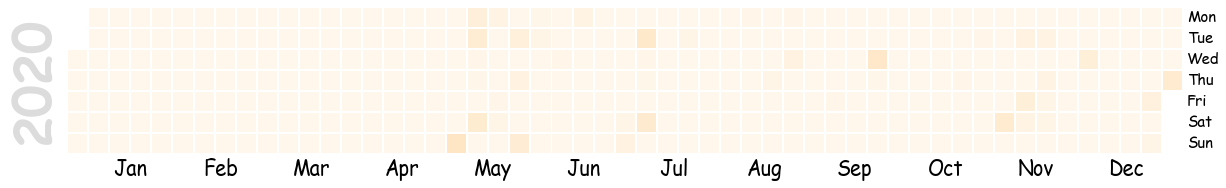

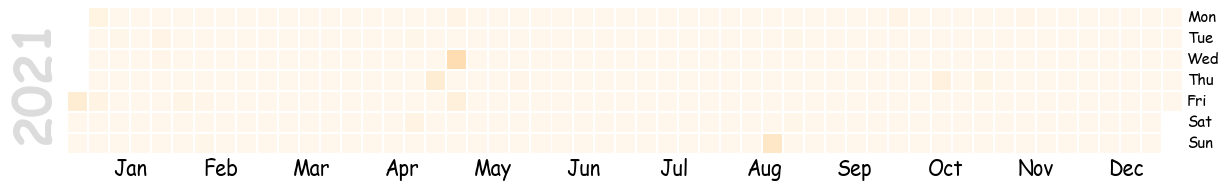

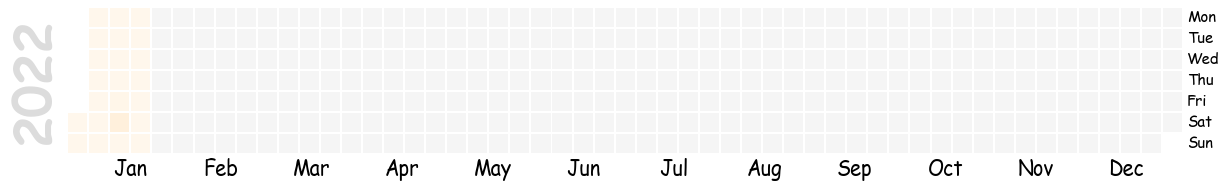

In [9]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')


#### <a name="gs-averages">Averages / Summaries</a> 


In [10]:
general.print_stats(df, love=True)


##########################
##  Number of Messages  ##
##########################

4323	Person1
856	Person2
1575	Person4
575	Person3
357	Person6
116	Person5
131	Person7
198	Person8
430	Person9
1534	Person10
193	Person11
402	Person13
142	Person12
1727	Person14
406	Person15
592	Person16
281	Person17
47	Person18
425	Person19
163	Person20
16	Person21
48	Person22
24	Person23
254	Person24
60	Person25
58	Person26
99	Person27
673	Person28
95	Person29
562	Person30
58	Person31
25	Person32
99	Person33
118	Person34
262	Person35
12	Person36
248	Person37
752	Person38
141	Person39
432	Person40
81	Person41
40	Person42
374	Person43
53	Person44
145	Person45
9	Person46
14	Person47
51	Person48
193	Person49
200	Person50
247	Person51
18	Person52
18	Person53
17	Person54
43	Person55
10	Person56

#######################
##  Number of Words  ##
#######################

15858	Person1
2929	Person2
6033	Person4
1845	Person3
952	Person6
404	Person5
400	Person7
609	Person8
1387	Person9
6554	Person10
663	Person11
1879

#### <a name="gs-response">Response Time</a> 


In [11]:
general.print_timing(df)


#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Person2:                      7.41
Person4:                      11.05
Person3:                      7.16
Person1:                      10.3
Person6:                      12.49
Person5:                      1.87
Person7:                      6.88
Person8:                      11.04
Person9:                      16.92
Person10:                     6.35
Person11:                     12.88
Person13:                     4.4
Person12:                     7.36
Person14:                     6.95
Person15:                     4.9
Person16:                     17.97
Person17:                     5.3
Person18:                     19.22
Person19:                     4.33
Person20:                     4.73
Person21:                     6.21
Person22:                     21.91
Person23:                     5.61
Person24:                     14.94
Person25:                     44.65
Per

## <a name="tfidf">TF-IDF</a> 


#### <a name="tf-count">Create Count Vector</a> 


In [12]:
counts = tf_idf.count_words_per_user(
    df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")


#### <a name="tf-unique">Unique Words</a> 


Below you can see three version of TF-IDF that I created. After much experimentation it turns out that they are all quite similar and that Version C gives me a nice distribution of values needed for the plotting. Content-wise they all have a very similar meaning. 

**Version A - Messages**  
  
$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} m_i}{m_i} $  
  
$t_{ij} = $ Number of times word $j$ said by $i$   
$m_i = $ Number of messages texted by $i$  
  

**Version B - Words**

$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} w_i}{w_i}$

$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$w_i = $ Number of words texted by $i$


**Version C - Adjusted TF-IDF**

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$m = $ Number of all messages   

** Unique Words **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $


In [13]:
unique_words = tf_idf.get_unique_words(counts, df, version='A')


#### <a name="tf-image">Plot Image</a> 


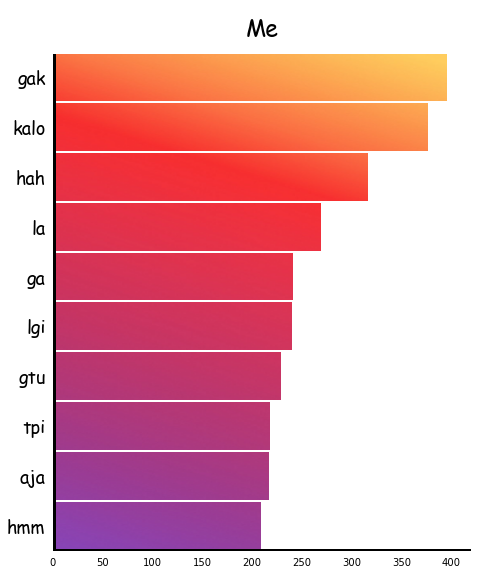

In [14]:
tf_idf.plot_unique_words(unique_words,
                         user=user,
                         image_path='images/mask.png',
                         image_url=None,
                         title="Me",
                         title_color="black",
                         title_background='#fff',
                         width=400,
                         height=500)


## <a name="emoji">Emoji Analysis</a> 


#### <a name="emoji-prepare">Prepare Data</a> 


In [33]:
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

user = "Person43"


#### <a name="emoji-stats">Unique and Common Emoji</a> 


In [38]:
emoji.print_stats(unique_emoji, counts)


#############################
### Unique Emoji (TF-IDF) ###
#############################

Person1
😘 0.004137158414733199
💞 0.003203247601622328
💋 0.0030146324810314444

Person2
:( 0.0030293551062827756
BD 0.002846928024521518
🤘 0.002405323350596431

Person4
😂 0.008835698814672664
💚 0.006518433480297205
👌 0.0058705015633144

Person3
👀 0.02864683685925087
🙄 0.0207814863306982
:) 0.013008826066855942

Person6
🤭 0.06649636828647998
🥳 0.03946989146950087
:/ 0.029105695549750656

Person5
❤ 0.026647634880320438
🎊 0.014640300212217463
🎉 0.013523825759685998

Person7
😂 0.03879488926449423
🎂 0.02923375759442106
BD 0.025193785728770627

Person8
❣ 0.04839800647430992
💙 0.03635085095612118
💕 0.035235162897939175

Person9
😀 0.05846218802057974
🤩 0.05015902823446981
🤑 0.016759521718786908

Person10
🤭 0.015355524965440062
🖕 0.013343092090892213
💕 0.007408603810263862

Person11
😪 0.02124206986723564
😅 0.018907110489355755
😂 0.015482482578921031

Person13
😌 0.0101931749964552
☝ 0.0051126097013699705
😶 

C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129395 missing from c

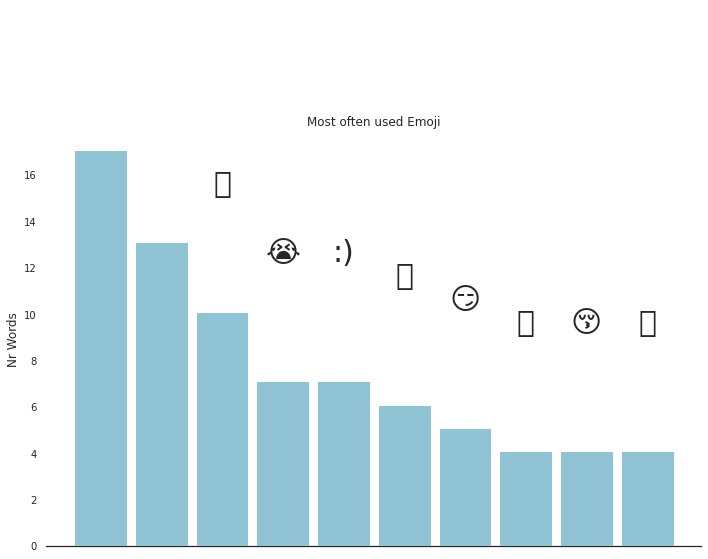

In [35]:
emoji.plot_counts(counts, user)


#### <a name="emoji-corr">Correlation Matrix</a> 


C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Ryas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128073 missing from cur

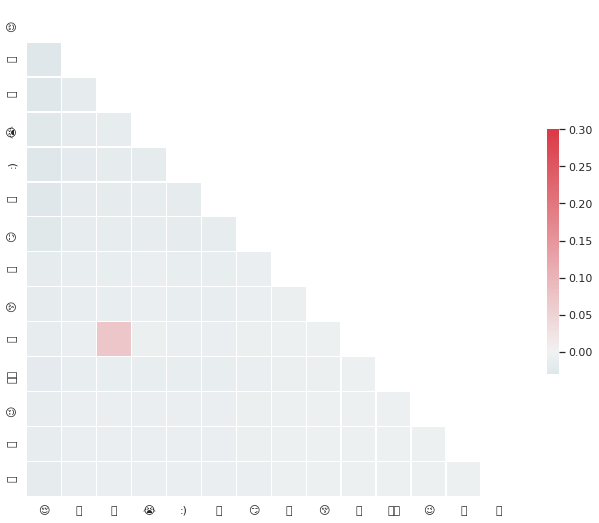

In [39]:
emoji.plot_corr_matrix(df, user, list_of_words, counts)


## <a name="sentiment">Sentiment</a> 


#### <a name="sentiment-prepare">Prepare Data</a> 


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(
    row.Message_Clean)["compound"], 1)


#### <a name="sentiment-average">Average Sentiment Per User</a> 


In [20]:
sentiment.print_avg_sentiment(df)


			#######################
			## Average Sentiment ##
			#######################
Person1:                      		0.015
Person2:                      		0.006
Person4:                      		0.034
Person3:                      		0.023
Person6:                      		0.119
Person5:                      		0.036
Person7:                      		0.055
Person8:                      		0.076
Person9:                      		0.055
Person10:                     		0.025
Person11:                     		0.033
Person13:                     		0.004
Person12:                     		0.047
Person14:                     		0.014
Person15:                     		0.031
Person16:                     		0.048
Person17:                     		0.005
Person18:                     		0.04
Person19:                     		0.074
Person20:                     		0.097
Person21:                     		0.266
Person22:                     		0.036
Person23:                     		0.17
Person24:                     		0.073
Person25:

#### <a name="sentiment-plot">Plot Sentiment</a> 


IndexError: list index out of range

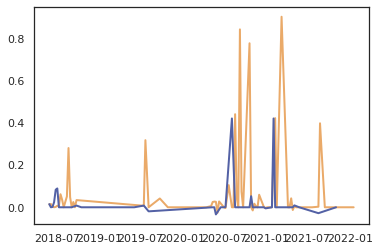

In [21]:
sentiment.plot_sentiment(df, colors=['#EAAA69', '#5361A5'], savefig=False)


## <a name="cloud">Word Clouds</a> 


#### <a name="cloud-prepare">Prepare Data</a> 


In [25]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")
words = counts[["Word", user]].set_index('Word').to_dict()[user]



#### <a name="cloud-mask">Masked Word Cloud</a> 


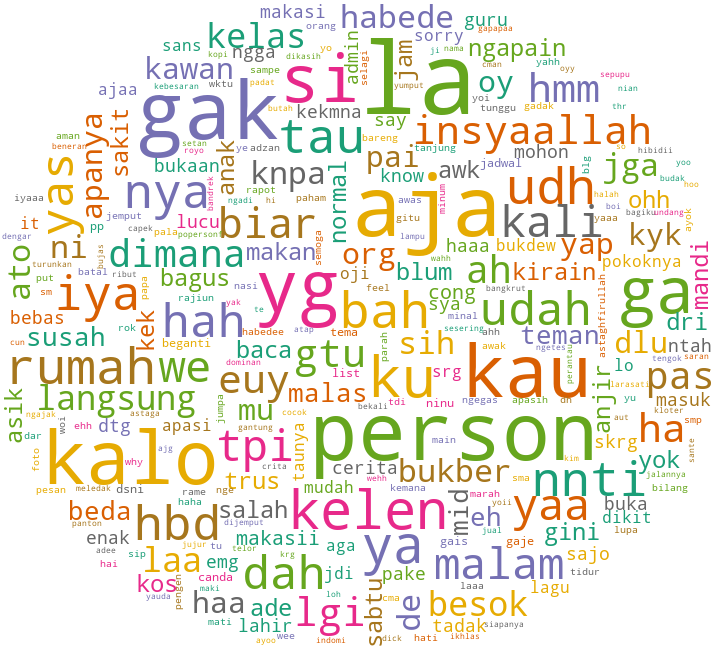

In [26]:
wordcloud.create_wordcloud(words, random_state=42, mask="images/circle.jpg",
                           max_words=1000, max_font_size=50, scale=2,
                           normalize_plurals=False, relative_scaling=0.5)
